# Small Multiples

*Purpose*: A powerful idea in visualization is the *small multiple*. In this exercise you'll learn how to design and create small multiple graphs.

> "At the heart of quantitative reasoning is a single question: *Compared to what?*" 

*Edward Tufte on visual comparison.*


## Setup


In [1]:
import grama as gr
DF = gr.Intention()
%matplotlib inline

# Fundamentals of small multiples

**Facets** in ggplot allow us to apply the ideas of [small multiples](https://en.wikipedia.org/wiki/Small_multiple). As an example, consider the following graph; this example introduces the new ggplot utility `facet_wrap()`. This visual depicts economic data across several decades.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


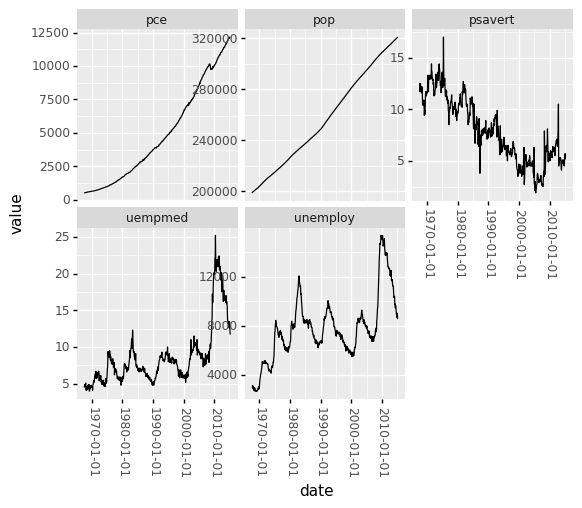

<ggplot: (8759511485308)>

In [2]:
## NOTE: No need to edit
from plotnine.data import economics as df_economics

(
    df_economics
    >> gr.tf_pivot_longer(
        columns=["pce", "pop", "psavert", "uempmed", "unemploy"],
        names_to="variable",
        values_to="value",
    )
    >> gr.ggplot(gr.aes("date", "value"))
    + gr.geom_line()
    
    ## Faceting allows us to implement small multiples
    + gr.facet_wrap("variable", scales="free_y")
    
    + gr.theme(axis_text_x=gr.element_text(angle=270))

)

The "multiples" are the different panels; above we've separated the different variables into their own panel, and plotted each one against the date. This allows us to compare trends simply by looking across at different panels. For instance, we can see that `pce` and `pop` exhibit smooth growth over time, while the other variables seem to exhibit cyclical trends.

The faceting above works particularly well for *comparing trends*: It's clear by inspection whether the various trends are increasing or decreasing, and we can easily see how each trend compares with others by looking at a different panel.

The `facet_wrap(var)` utility takes the name of a column `var` to use as a grouping variable; each unique value in the given column will be used to construct a small multiple. You'll practice using this utility in the next task.


In [3]:
## NOTE: Run this cell
from grama.data import df_stang

### __q1__ Use `facet_wrap()`

Use `gr.facet_wrap()` to create a small multiple for each material `"property"`. Make sure to free the `y` scale in order scale both multiples to fit their data properly.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


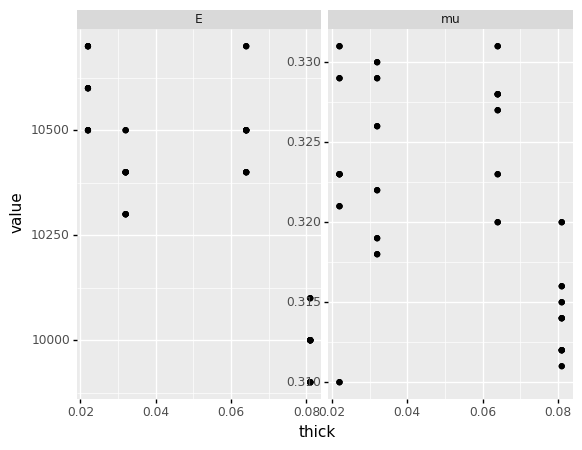

<ggplot: (8759460221188)>

In [4]:
## TASK: 
(
    df_stang
    >> gr.tf_pivot_longer(
        columns=["E", "mu"],
        names_to="property",
        values_to="value",
    )
    
    >> gr.ggplot(gr.aes("thick", "value"))
    + gr.geom_point()

    + gr.facet_wrap("property", scales="free_y")
)

"Freeing" a scale allows it to adjust to the data. This can be a good idea if each group of values has very different numerical values (or if they have different units!). In the example above `E` and `mu` take very different numerical values (order 10,000 vs order 0.1), so freeing the scale is a good idea.

Freeing the scales is *not* always a good idea. The next exercise will have you consider when *not* to free the scales.


In [5]:
from plotnine.data import mpg 
df_mpg = (
    mpg
    >> gr.tf_rename(carclass="class")
)

### __q2__ To free the scales? Or not?

Run the following code as-is and inspect the results. Answer the questions under *observations* below. Re-run the code following the instructions below.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


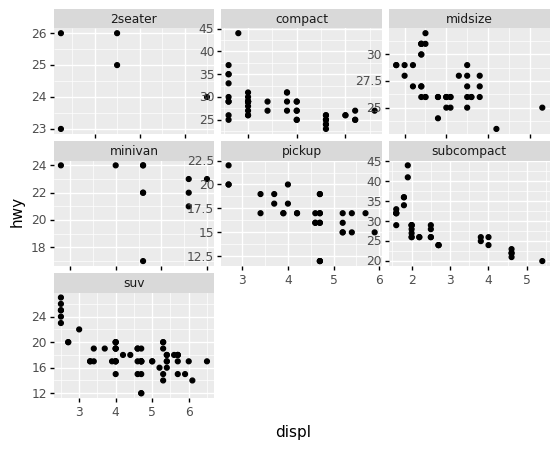

<ggplot: (8759460220185)>

In [6]:
## TASK: Run this code, then try disabling the `scales` argument

(
    df_mpg
    >> gr.ggplot(gr.aes("displ", "hwy"))
    + gr.geom_point()
    + gr.facet_wrap(
        "~carclass", 

    )
)

*Observations*

- Based on the plot above, how much **visual** variation is there among `2seater` vehicles, with respect to their `hwy` fuel economy and engine displacement (`displ`)?
  - In this version of the plot (`scales="free"`) the `hwy` and `displ` values fill up the entire panel, which gives the impression of large variability among the values.
- Now comment out the `scales="free"` argument, re-run the code, and inspect the new plot.
- With the new plot, how much **visual** variation is there among `2seater` vehicles, with respect to their `hwy` fuel economy and engine displacement (`displ`)?
  - In this version of the plot (`scales="fixed"`) the `hwy` and `displ` values are tightly clustered within their panel, which gives the impression of very small variability among the values.
<!-- solution-end -->

If the different groups have similar values, or if you are trying to encourage *numerical* comparisons rather than just trend comparisons, it may be a good idea to keep the scales fixed.


# Finer Points

With the basics of facets under our belt, now we can move on to some finer points about constructing small multiple plots.

## "Ghost points"

This version of the `df_mpg` plot is not as effective as it could be:


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


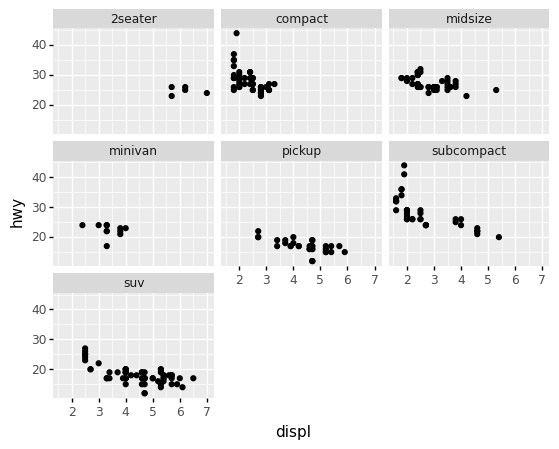

<ggplot: (8759493742903)>

In [7]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes("displ", "hwy"))
    + gr.geom_point()
    + gr.facet_wrap("~carclass") 
)

With these scatterplots it's difficult to "keep in our heads" the absolute positions of the other points as we look across the multiples. Instead we could add some "ghost points":


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/facets/facet.py:487: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


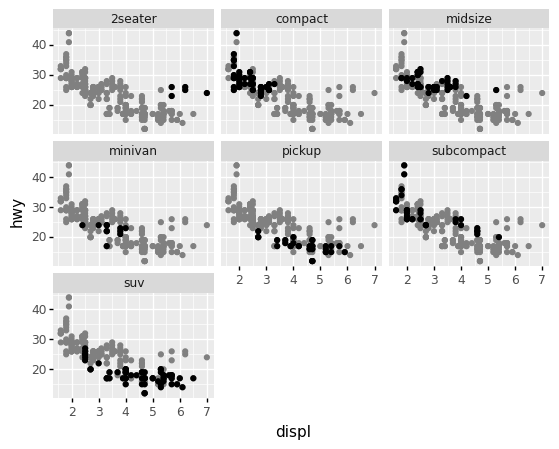

<ggplot: (8759511839853)>

In [8]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes("displ", "hwy"))
    ## A bit of a trick; remove the facet variable to prevent faceting
    + gr.geom_point(
        data=df_mpg >> gr.tf_drop("carclass"),
        color="grey",
    )
    + gr.geom_point()
    + gr.facet_wrap("carclass")
)

Here we're using *visual weight* to call attention to the black points within each panel, while using lower-weight grey points to de-emphasize the bulk of data. From this version of the plot we can see clearly that the `2seater` vehicles are tightly clustered **and** they tend to have higher `hwy` for similar `displ` vehicles.


There's a trick to getting the visual above; removing the facet variable from an internal dataframe prevents the faceting of that layer. This combined with a second point layer gives the "ghost" point effect.

The presence of these "ghost" points provides more context; they facilitate the "Compared to what?" question that Tufte puts at the center of quantitative reasoning.


In [9]:
from grama.data import df_diamonds

### __q3__ Use the "ghost point" trick

Edit the following figure to use the "ghost" point trick demonstrated above.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/facets/facet.py:487: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


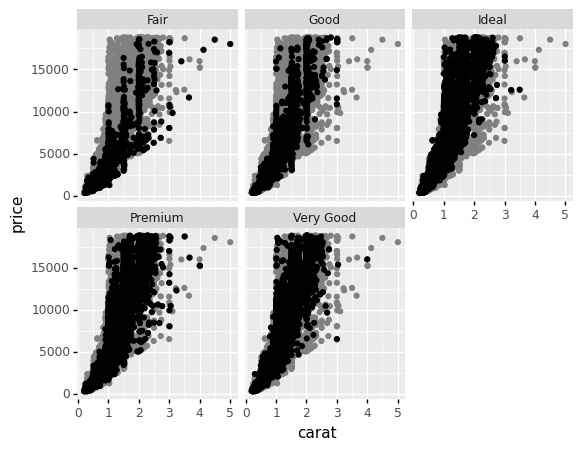

<ggplot: (8759511575929)>

In [10]:
## TASK: Add "ghost points" to the following plot in order to show
## every observation within each panel
(
    df_diamonds
    >> gr.ggplot(gr.aes("carat", "price"))
    + gr.geom_point(
        data=df_diamonds >> gr.tf_drop("cut"),
        color="grey",
    )
    + gr.geom_point()
    + gr.facet_wrap("cut")
)

## Aside: Reordering factors

The utility function `gr.fct_reorder()` allows us to "reorder" factor levels according to another variable. This is useful because it enables us to control the *order* in which factor levels are displayed on a plot.


### __q4__ Reorder the `"carclass"`

Use `gr.fct_reorder()` to reorder the `"carclass"` variable according to `"hwy"`. Answer the questions under *observations* below.

*Hint*: Remember to check the documentation for a new function to learn how to use it!


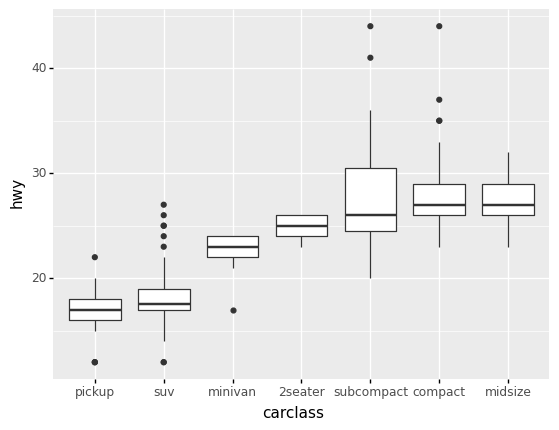

<ggplot: (8759482652085)>

In [11]:
## TASK: Reorder `carclass` by `hwy`
(
    df_mpg
    >> gr.tf_mutate(carclass=gr.fct_reorder(DF.carclass, DF.hwy))
    
    >> gr.ggplot(gr.aes("carclass", "hwy"))
    + gr.geom_boxplot()
)

*Observations*

- When you *do not* reorder `carclass`, what order are the classes listed along the horizontal axis?
  - The `carclass` values are listed in alphabetical order.
- When you *do* reorder `carclass`, what is changed about the plot? What do you notice about the boxplots?
  - Now the boxplots tend to "rise" across the plot; the `carclass` values are now ordered by their median `hwy` value.
<!-- solution-end -->

## Controlling the facet axis

Sometimes you'll want to place facets along the horizontal or vertical axis *only*; this is helpful when seeking to make more direct comparisons across an axis. The utility `facet_grid()` allows you to specify whether to facet along the vertical or horizontal axis of the plot.

For example, consider the following figure:


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


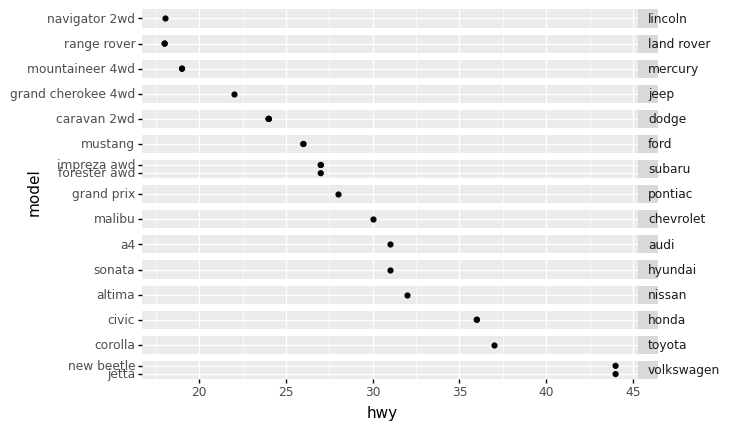

<ggplot: (8759511580245)>

In [12]:
## NOTE: No need to edit
(
    df_mpg
    ## Find highest fuel economy models within each manufacturer
    >> gr.tf_group_by(DF.manufacturer)
    >> gr.tf_filter(DF.hwy == gr.max(DF.hwy))
    >> gr.tf_ungroup()
    ## Reorder manufacturers based on their fuel economy
    >> gr.tf_mutate(manufacturer=gr.fct_reorder(DF.manufacturer, DF.hwy))
    
    ## Visualize
    >> gr.ggplot(gr.aes("hwy", "model"))
    + gr.geom_point()
    ## Use facet_grid to control which axis gets the faceting
    + gr.facet_grid("manufacturer~.", scales="free_y")
    + gr.theme(strip_text_y=gr.element_text(angle=0, hjust=0))
)

For this visual to work I need all facets to share a common horizontal axis. Note what happens when I simply wrap the facets instead:


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


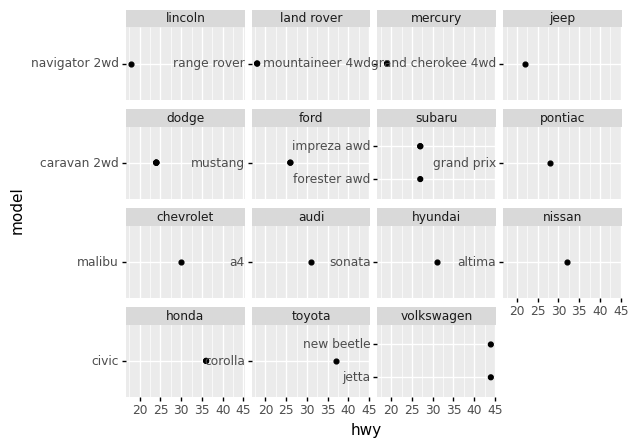

<ggplot: (8759495461825)>

In [13]:
## NOTE: No need to edit
(
    df_mpg
    ## Find highest fuel economy models within each manufacturer
    >> gr.tf_group_by(DF.manufacturer)
    >> gr.tf_filter(DF.hwy == gr.max(DF.hwy))
    >> gr.tf_ungroup()
    ## Reorder manufacturers based on their fuel economy
    >> gr.tf_mutate(manufacturer=gr.fct_reorder(DF.manufacturer, DF.hwy))
    
    ## Visualize
    >> gr.ggplot(gr.aes("hwy", "model"))
    + gr.geom_point()
    ## Use facet_grid to control which axis gets the faceting
    + gr.facet_wrap("manufacturer", scales="free_y")
    + gr.theme(strip_text_y=gr.element_text(angle=0, hjust=0))
)


This figure is essentially useless; without a common horizontal axis is it almost impossible to compare values across panels.


### __q5__ Facet along a single axis

Use `gr.facet_grid()` to facet by the `"metric"` column. Experiment with both forms of the argument `"~metric"` and `"metric~."` to test faceting along the horizontal and vertical axes. Answer the questions under *observations* below.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


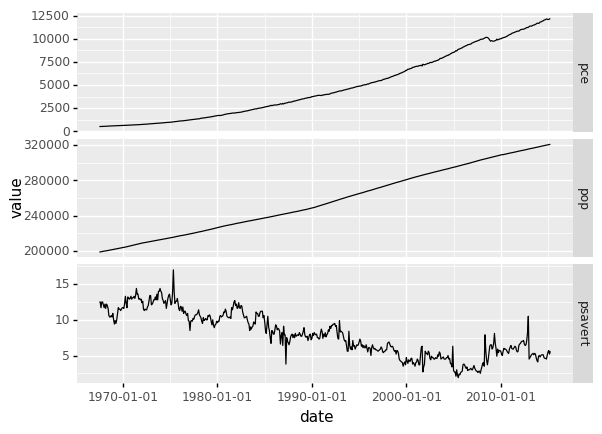

<ggplot: (8759495804109)>

In [14]:
## TASK: Facet by "metric" along a single axis
(
    df_economics
    >> gr.tf_select("date", "pce", "pop", "psavert")
    >> gr.tf_pivot_longer(
        columns=["pce", "pop", "psavert"],
        names_to="metric",
        values_to="value",
    )
    
    >> gr.ggplot(gr.aes("date", "value"))
    + gr.geom_line()
    
    + gr.facet_grid(
# task-begin
        ## TODO: Test both forms of the argument
# task-begin
        "metric~.", 
        scales="free_y",
    )
)

*Observations*

- Which axis does the argument `"metric~."` facet along?
  - Along the vertical axis (panels stacked vertically)
- Which axis does the argument `"~metric"` facet along?
  - Along the horizontal axis (panels stacked horizontally)
- Which version of the faceting---along the horizontal or along the vertical---do you find more effective?
  - I find vertical faceting more effective; this form gives all of the panels a common horizontal axis that eases comparison.
<!-- solution-end -->

The `facet_grid()` utility also allows us to facet by *multiple* columns through the syntax `gr.facet_grid("var1~var2")`. This functionality is used by a number of functions in grama.


## Sinew plots and facets

Facets show up in a variety of grama functions; for instance, the `ev_sinews()` utility has autoplot functionality that makes heavy use of facets. The autoplot facets along the horizontal axis by the inputs, and along the vertical axis by the outputs. This allows us to quickly assess how every model input affects every model output.


Calling plot_sinew_outputs....


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


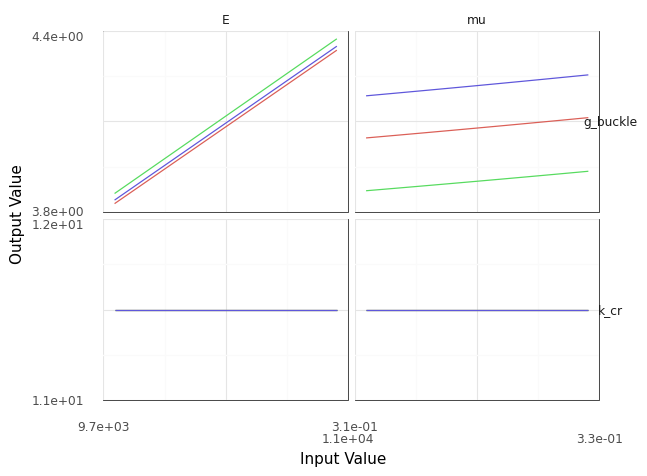

<ggplot: (8759493948103)>

In [15]:
## NOTE: No need to edit
from grama.models import make_plate_buckle
md_plate = make_plate_buckle()

(
    md_plate
    >> gr.ev_sinews(df_det="nom")
    >> gr.pt_auto()
)

We'll learn more about this in the future exercise `e-grama04-ema`.
